In [1]:
### Local Modules
import main
import firedb
import models
import visuals


import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import holoviews as hv, panel as pn

import mysql.connector

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

pd.set_option("display.max_columns", None)

### <ins>Ben Keesey:</ins>

Working currently as a **<ins>Lead Supply Chain Engineer</ins>** at **<ins>Armada Supply Chain Solution</ins>**.

Main working tasks include data analytics, data cleaning, sourcing/channel analysis (flow/network optimization).

# <ins>Final Static Dashboard:</ins>

***


***

![alt text](Assets/HSA_and_Portfolio_Success_Analysis.png "HSA and Portfolio Success Analysis")

# Database Connection:
***

Stores, loads, and returns user infomation to run models.

In [2]:
d = {
    'user_id': 'John1855', 'name': 'John', 'age': 18, 'retirement_age': 55, 'yearly_savings': 10000, 'time_window': 50
    , 'retirement_spend': 60000, 'yearly_HSA_qualified_expense': 3600, 'balance_brokerage': 6000, 'balance_HSA': 10800
    , 'balance_401k': 5000, 'balance_roth': 6000, 'balance_HSA_qualified_expense': 8000, 'balance_401k_contributions': 5000
    , 'growth_comparison_starting_balance': 5000, 'HSA_contribution_limit': 3600, 'Roth_contribution_limit': 6000
    , 'Traditional_401k_contribution_limit': 20500, 'Expense_Ratio': .1, 'Marginal_Tax_Rate': 24
    , 'Capital_Gains_Tax': 10, 'Retired_Marginal_Tax_Rate': 24, 'Retired_Capital_Gains_Tax': 0
    , 'color_scheme': 'stickies'
}

In [3]:
user_var_series = pd.Series(data=d)

In [4]:
firedb.load_new_user_profile(user_var_series)

1 record inserted.


In [5]:
df = firedb.return_user_profile('John1855')
df

user_id  name  age  retirement_age  yearly_savings  time_window  \
0  John1855  John   18              55           10000           50   

   retirement_spend  yearly_HSA_qualified_expense  balance_HSA  \
0             60000                          3600        10800   

   balance_brokerage  balance_401k  balance_roth  \
0               6000          5000          6000   

   balance_HSA_qualified_expense  balance_401k_contributions  \
0                           8000                        5000   

   growth_comparison_starting_balance  HSA_contribution_limit  \
0                                5000                    3600   

   Roth_contribution_limit  Traditional_401k_contribution_limit  \
0                     6000                                20500   

   Expense_Ratio  Marginal_Tax_Rate  Capital_Gains_Tax  \
0            0.1                 24                 10   

   Retired_Marginal_Tax_Rate  Retired_Capital_Gains_Tax color_scheme  
0                         24                          0     stickies

Historical Market data stored as table using sqlalchemy

In [6]:
yearly_market_df = firedb.get_market_data()
yearly_market_df

start_Real_Price  end_Real_Price  Real_Return_Percentage
Year                                                          
1871             99.37          109.90               10.596760
1872            113.19          121.57                7.403481
1873            123.13          120.32               -2.282141
1874            125.64          140.50               11.827443
1875            141.34          152.66                8.009056
...                ...             ...                     ...
2017        1532310.54      1799173.67               17.415734
2018        1876445.34      1733302.63               -7.628398
2019        1760053.06      2137761.00               21.460031
2020        2200785.50      2499180.71               13.558578
2021        2558146.38      2885108.72               12.781221

[151 rows x 3 columns]

# Model Calculations:
***

In [7]:
# Create dict from created Series
user_vars_dict = user_var_series.to_dict()

# Create Model instance with required parameters 
Model_instance = models.Model(**user_vars_dict)

#### Models for a singe account type.

In [8]:
Brokerage_models_df, Brokerage_models_liquid_df = Model_instance.Monte_Carlo_Growth_Models('Brokerage', yearly_market_df)

HSA_models_df, HSA_models_liquid_df = Model_instance.Monte_Carlo_Growth_Models('HSA', yearly_market_df)

Roth_models_df, Roth_models_liquid_df = Model_instance.Monte_Carlo_Growth_Models('Roth', yearly_market_df)
Roth_models_df.head()

1871          1872          1873          1874          1875  \
1  13921.256516  13519.305751  12300.137806  14076.167622  13595.531937   
2  23091.464047  20616.696119  22231.561543  23388.811839  18363.773468   
3  29961.050574  31522.455897  32188.567278  26848.654819  29288.045822   
4  41961.559042  42213.539572  34472.748233  38859.289158  46372.016340   
5  53477.441176  43158.367484  47459.533554  58404.040332  65939.792791   

           1876          1877          1878          1879          1880  \
1  10916.618955  14213.241300  15839.478423  15393.929030  15740.483361   
2  20887.394703  27421.457533  28636.957727  28725.044231  21869.962026   
3  35811.545535  42787.129508  45268.827790  34036.456128  31102.576014   
4  53037.638973  62945.855050  49537.931081  43943.084844  40564.784201   
5  75751.249787  66101.251940  60303.329985  54023.125308  47829.360241   

           1881          1882          1883          1884          1885  \
1  11806.161735  13298.030633  13206.259985  12512.252448  16477.789109   
2  20481.248668  21903.557596  20661.363289  26302.020186  27786.824065   
3  29432.402429  29298.092124  36959.109857  39124.417367  33531.820816   
4  36774.505394  48253.887344  51423.165993  44275.089169  41958.344789   
5  58031.249340  64457.834313  55929.128379  52917.493904  53512.067610   

           1886          1887          1888          1889          1890  \
1  14540.952313  11939.498767  12853.190884  13605.217341  10779.916958   
2  20980.307367  19932.135509  22084.929149  18142.101747  22172.192650   
3  29154.614770  29728.625988  25396.910407  31053.395967  29741.086876   
4  39686.866842  31936.467326  39805.068547  38613.011175  34519.495473   
5  40456.229981  47693.913539  47355.540070  42721.033680  45815.025221   

           1891          1892          1893          1894          1895  \
1  15199.721959  12586.835610  11647.910636  13705.513594  12941.881550   
2  22775.900972  18661.464857  20936.706419  21883.605818  21107.017441   
3  28080.617460  28565.624095  29311.005897  30294.741049  32540.312456   
4  38811.205369  37146.922479  37926.479292  42954.887832  47388.942535   
5  47670.501785  45977.972898  51605.704572  59684.205920  47939.498108   

           1896          1897          1898          1899          1900  \
1  12946.643622  14282.498619  14875.337022  10984.711622  15294.433391   
2  23290.270568  25834.090621  19594.055222  22558.939207  25711.056060   
3  36468.506776  29147.924113  33009.338590  33869.288809  31519.667385   
4  38419.034806  44606.244256  45605.364553  39239.169950  33971.731884   
5  55859.925602  58628.997267  50344.107697  40675.389888  52323.043049   

           1901          1902          1903          1904          1905  \
1  14150.134263  11922.402230  10941.908517  15858.621052  14716.997699   
2  20580.464225  16953.360256  23337.230218  27400.037463  21802.194315   
3  24472.068374  30903.367925  36135.170312  34192.664627  21477.206485   
4  40366.569737  44972.537869  42726.297435  30527.982985  38523.212872   
5  56025.706067  51359.806624  36761.483516  50514.219984  48794.893279   

           1906          1907          1908          1909          1910  \
1  12309.346090   9203.830123  16693.229538  13329.853170  12676.786828   
2  14543.034863  22262.713759  25700.411331  21057.403729  21296.069460   
3  29336.409813  31592.507116  33503.350456  30097.966977  29244.601751   
4  39075.945986  39431.353808  43169.552146  38152.664070  32852.500878   
5  46960.398197  49395.547034  51381.913227  40795.377480  36992.370880   

           1911          1912          1913          1914          1915  \
1  13233.382462  12751.975924  11234.794010  11522.251109  16392.180114   
2  21084.665998  18146.845810  17223.748108  24877.411457  23699.355542   
3  25576.691566  23544.573229  32294.869055  32081.024632  20356.119453   
4  30338.902475  40518.051900  39407.952156  25807.294221  27987.234031   
5  49357.247832  47530.77104

#### Series tracking yearly deposits

In [9]:
cash_balance_df = Model_instance.cash_balance()
cash_balance_df.head()

0
1   7600.0
2  15200.0
3  22800.0
4  30400.0
5  38000.0

#### Models for all accounts including spending in retirement.

In [10]:
Net_Return_Spending_df, Liquid_Return_Spending_df = Model_instance.Monte_Carlo_Plot_Spending(yearly_market_df)
Net_Return_Spending_df.head()

1             2             3             4              5   \
1871  40003.785110  51956.124333  58982.210756  75267.921703   90287.958313   
1872  38866.073041  46203.684187  60999.213397  74897.017700   72223.846502   
1873  35400.968046  48935.398475  61883.394330  60948.864949   78223.210892   
1874  40442.257307  52717.958914  53007.947014  69263.701836   97535.122682   
1875  39081.829445  41193.627218  55944.252229  80808.056819  108897.724103   

                 6              7              8              9   \
1871   85558.531742  105970.988012  143655.465730  185637.108595   
1872   90936.733268  124773.209244  162586.294939  213420.764882   
1873  108802.334709  143086.047077  189076.383590  185094.739511   
1874  129315.978337  171868.183528  168970.708313  187200.018487   
1875  146384.893222  145092.942686  162005.588967  178618.727268   

                 10             11             12             13  \
1871  242192.059544  234863.966571  256734.790349  277892.164986   
1872  207905.350850  228289.014095  248083.464338  254760.844347   
1873  204218.842625  222858.902166  229711.948332  311097.109387   
1874  205019.804080  211997.083355  287921.032361  341792.436977   
1875  185779.866055  253672.317652  302291.658134  294465.618811   

                 14             15             16             17  \
1871  284361.954479  382503.068727  450909.787053  435293.076504   
1872  343830.119459  406303.943430  393025.503892  409520.799700   
1873  368544.568816  357245.503366  373024.062865  411784.639904   
1874  331895.737881  347164.072506  383858.191809  335650.845117   
1875  308985.154552  342646.897157  300392.564635  372278.306732   

                 18             19             20             21  \
1871  452634.279541  497723.115349  433067.862593  532249.592679   
1872  451183.979492  393251.353082  484250.822934  492200.038010   
1873  359543.288879  443609.394226  451601.071176  425301.336159   
1874  414779.299869  422801.098296  398677.565492  442707.485090   
1875  380344.509893  359429.109332  400030.314510  419530.985213   

                 22             23             24             25  \
1871  540148.658984  507158.033761  560684.288993  584531.857015   
1872  462832.537555  512485.060182  535029.938330  558389.846563   
1873  471670.924201  493111.717837  515321.870643  593464.754255   
1874  463361.158992  484751.542760  558805.906391  669300.529945   
1875  439720.708061  507787.737861  609108.326377  538401.104058   

                 26             27             28             29  \
1871  609248.312306  699889.610206  835804.913939  736035.758036   
1872  642266.391041  767816.045972  676762.892310  831248.740472   
1873  710227.868939  626557.375043  770338.489040  874287.694278   
1874  590876.818193  727016.200558  825627.614851  789236.168947   
1875  663365.612541  754178.380148  721629.302666  634016.994172   

                 30            31            32            33            34  \
1871  903148.639639  1.023382e+06  9.763562e+05  8.552232e+05  1.086320e+06   
1872  942669.973879  8.999843e+05  7.889014e+05  1.002910e+06  1.180763e+06   
1873  835279.426048  7.327114e+05  9.322291e+05  1.098240e+06  1.081175e+06   
1874  692727.164486  8.818888e+05  1.039429e+06  1.023721e+06  7.539726e+05   
1875  808056.446234  9.532414e+05  9.395210e+05  6.924677e+05  9.278938e+05   

                35            36            37            38            39  \
1871  1.278137e+06  1.256922e+06  9.243175e+05  1.163657e+06  1.171061e+06   
1872  1.161794e+06  8.548299e+05  1.142890e+06  1.148895e+06  1.095896e+06   
1873  7.959405e+05  1.064922e+06  1.135377e+06  1.082276e+06  1.076680e+06   
1874  1.009301e+06  1.076530e+06  1.091585e+06  1.086284e+06  1.039386e+06   
1875  9.904252e+05  1.004958e+06  1.064208e+06  1.017004e+06  8.468123e+05   

                40            41             42             43             44  \
1871  1.118198e+06  1.114408e+06  997913.595281  759853.974832

# Creating Visuals:
***

In [11]:
# Create Model instance with required parameters 
visual_param_dict = {k:user_vars_dict[k] for k in ('name','time_window','color_scheme') if k in user_vars_dict}
Visuals_instance = visuals.Visualization(**visual_param_dict)

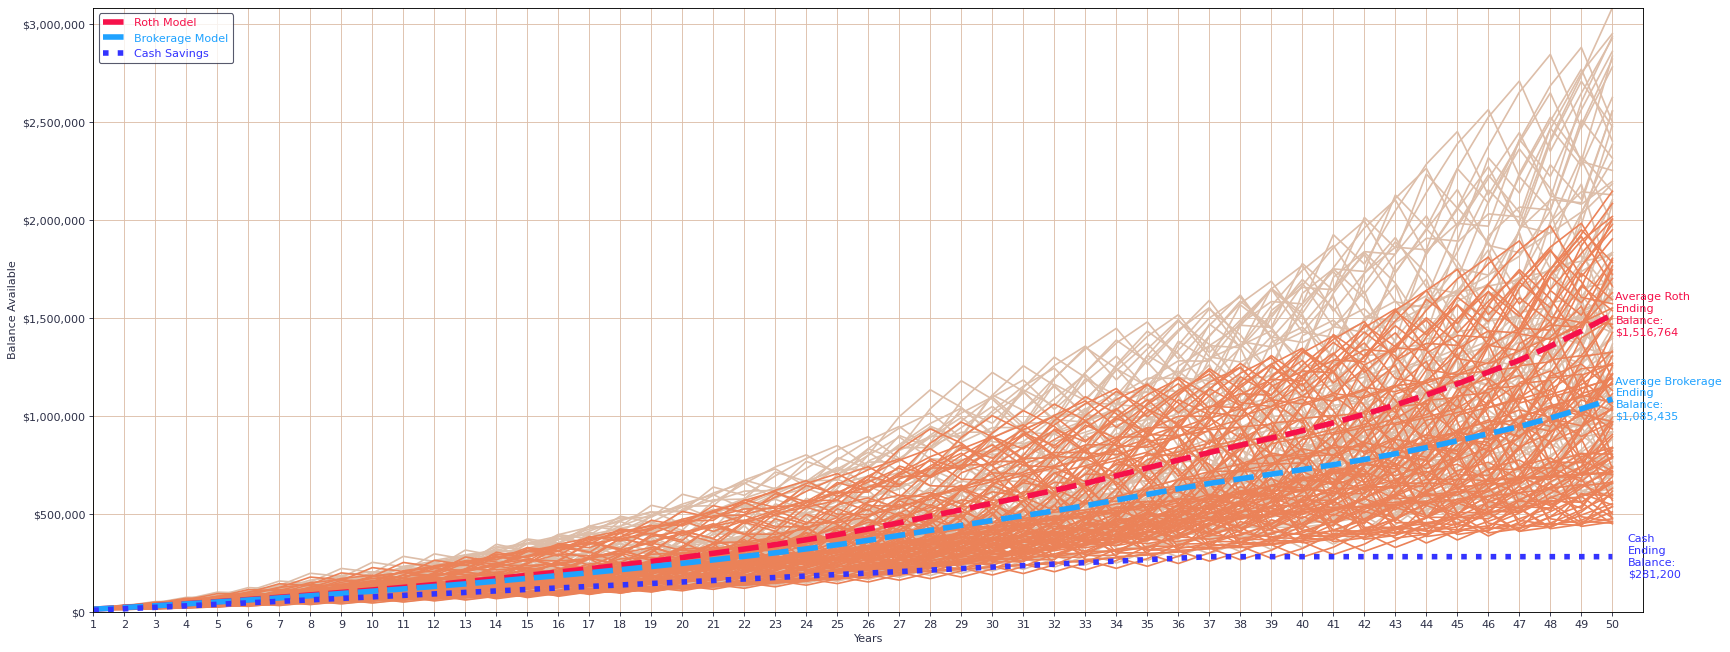

In [12]:
Visuals_instance.Monte_Carlo_Plot_Growth_Comparison(account1=Roth_models_df, 
        account1_name='Roth', account2=Brokerage_models_df, account2_name='Brokerage', cash_account=cash_balance_df)

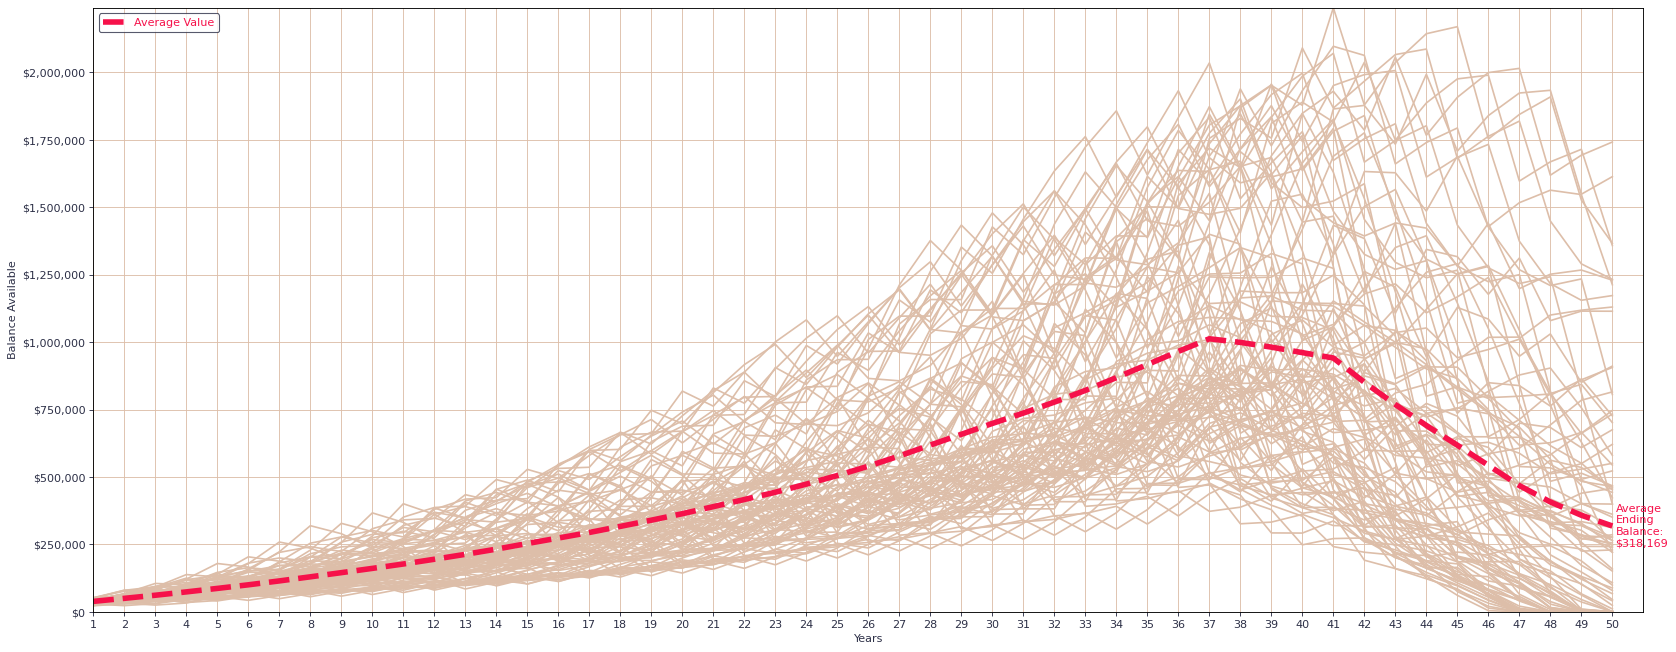

In [13]:
Visuals_instance.spending_fire_plot(df=Net_Return_Spending_df, file_name=f"Assets/{Visuals_instance.name}'s Plot")

# Future Steps:
-------------


- Use the panel framework to make the Dashboard interactive instead of static.
- Allow for dynamic adjustment of withdraws or qualified expenses as user ages.
- More visuals, statistics, tests, and other features.

### Citations:
----------

- http://www.econ.yale.edu/~shiller/data.htm
- https://www.firecalc.com/

### Appendix
-----------

In [ ]:
vis_dict = {}
for k in('name','time_window','color_scheme'):
    if k in user_vars_dict:
        vis_dict[k] = user_vars_dict[k]

vis_dict

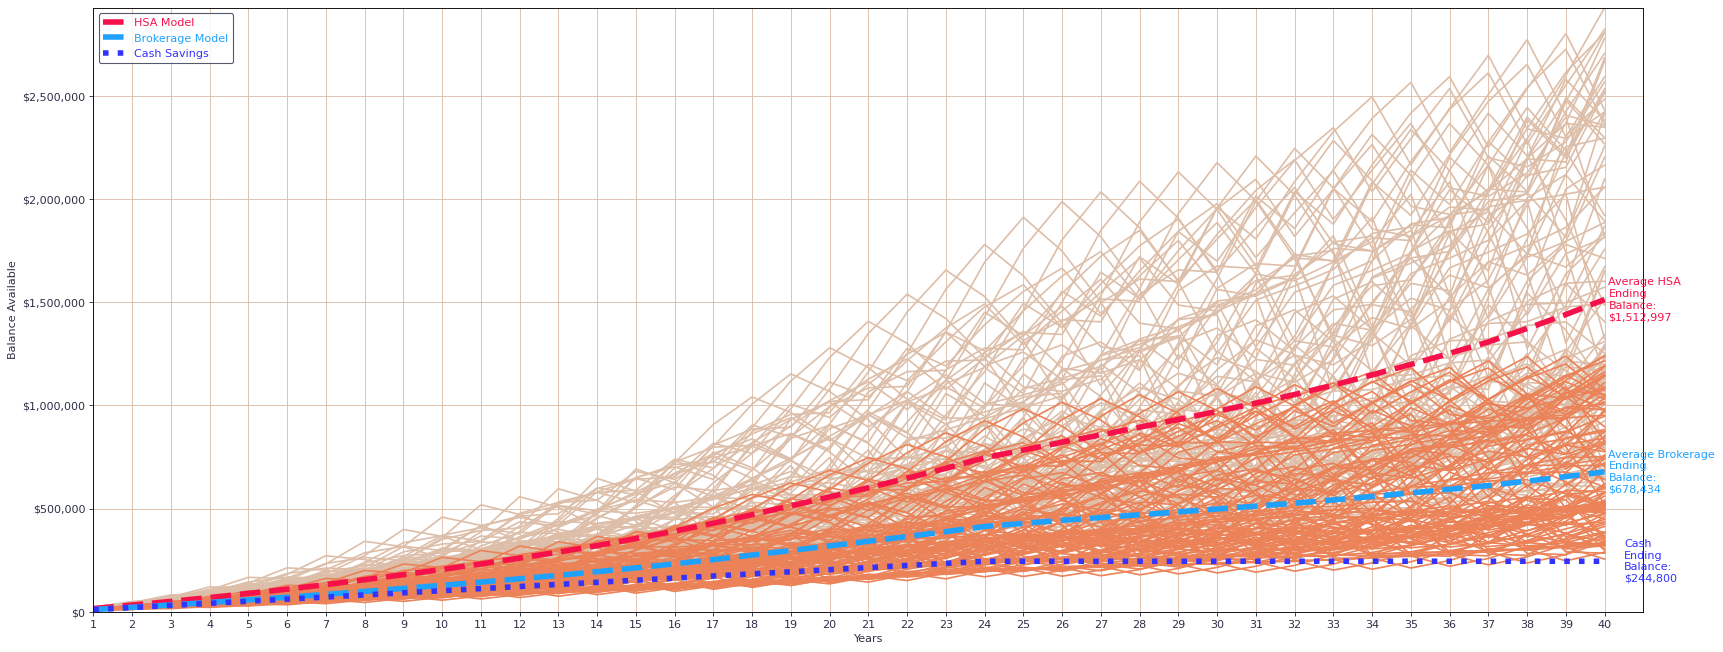

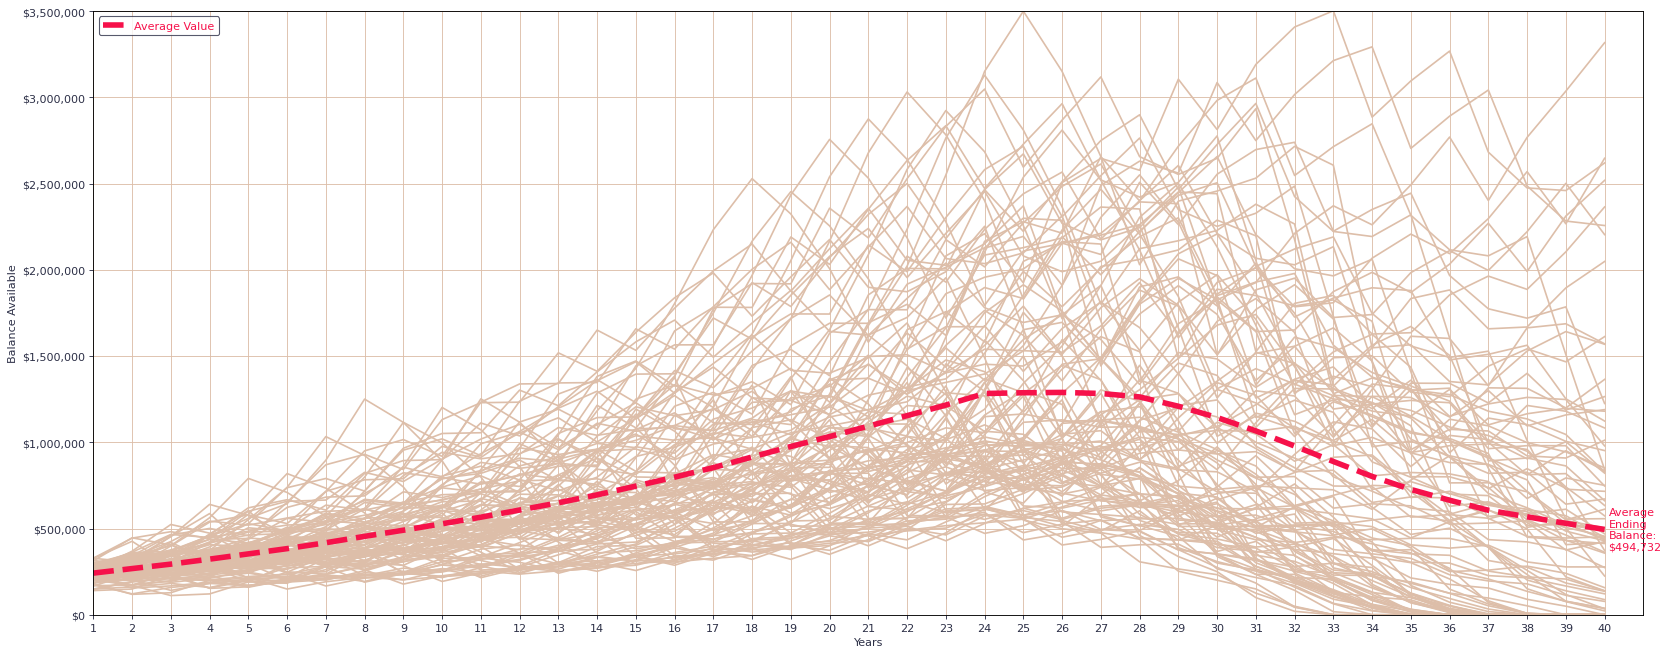

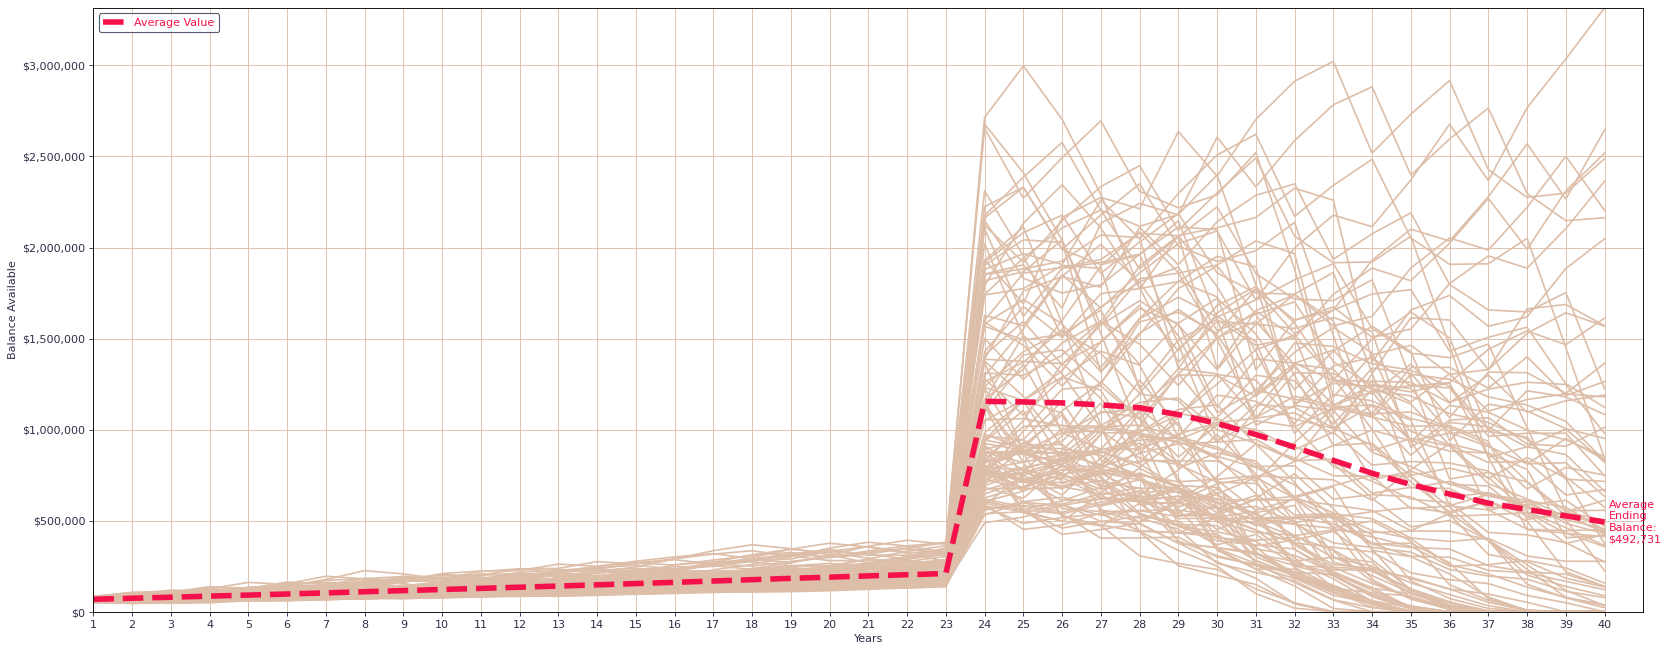

In [14]:
main.main('John3660')

In [ ]:
df = firedb.return_user_profile('Ben2752')
df

In [18]:
mydb = mysql.connector.connect(
  host="localhost",
  user="bkeesey",
  password="69CCHGtoXy",
  database="firedb"
)

print(mydb)

In [19]:
mycursor = mydb.cursor()
mycursor.execute("SHOW DATABASES")

for x in mycursor:
  print(x)

('firedb',)
('information_schema',)
('mysql',)
('performance_schema',)
('sakila',)
('sys',)
('world',)


In [ ]:
# Import dataframe into MySQL
import sqlalchemy
user = 'bkeesey'
password = '69CCHGtoXy'
port = 3306
host = '127.0.0.1'
dbname = 'myfirstdatabase'

In [ ]:
engine = sqlalchemy.create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}".format(host=host, db=dbname, user=user, pw=password))

In [ ]:
user_info = {'user':'bkeesey', 'password':'69CCHGtoXy', 'port':3306, 'host':'127.0.0.1'}

In [ ]:
pd.DataFrame.from_dict(user_info, orient='index').rename(columns={0: 'value'}).to_pickle('user_info.pkl')

In [ ]:
df = pd.read_pickle("user_info.pkl")

In [ ]:
db_info.loc['port'].astype(int)

In [ ]:
"mysql+pymysql://{user}:{pw}@{host}/{db}".format(host=host, db=dbname, user=user, pw=password)

In [ ]:
"mysql+pymysql://{user}:{pw}@{host}/{db}".format(host=db_info.loc['port'].astype(int)
    , db='myfirstdatabase', user=db_info.loc['user'].value, pw=db_info.loc['password'])

In [ ]:
engine = sqlalchemy.create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}".format(host=db_info.loc['host'].value
    , db='myfirstdatabase', user=db_info.loc['user'].value, pw=db_info.loc['password'].value))

In [ ]:
engine = sqlalchemy.create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}".format(host=host, db=dbname, user=user, pw=password))

In [ ]:
def historical_market_data():
    market_data_df = pd.read_csv(r'C:\Users\benjk\Documents\GitHub\fire_report\Data\ie_Data.csv', header=7)
    market_data_df = market_data_df.dropna(axis=1, how='all').dropna(axis=0, how='all')
    market_data_df = market_data_df.loc[market_data_df['Date'].notna()].copy()
    
    data_col_names = [
    'Date',
    'S&P_Comp_P',
    'Dividend',
    'Earnings',
    'CPI',
    'Date_Fraction',
    'Long_Interest_Rate_GS10',
    'Real_Price',
    'Real_Dividend',
    'Real_Total_Return_Price',
    'Real_Earnings',
    'Real_TR_Scaled_Earnings ',
    'CAPE',
    'TR_CAPE',
    'CAPE_Yield',
    'Monthly_Total_Bond_Returns',
    'Real_Total_Bond_Returns',
    '10_Year_Annualized_Stock_Real_Return',
    '10_Year_Annualized_Bond_Real_Return',
    'Real_10_Year_Excess_Annualized_Returns']
    
    market_data_df.columns = data_col_names
    market_data_df['Year'] = market_data_df['Date'].apply(np.floor).astype(int)
    market_data_df['Real_Total_Return_Price'] = market_data_df['Real_Total_Return_Price'].str.strip().str.replace(',','').astype(float)
    
    # Calculate the monthly returns. Currently only implementing the yearly returns, but this could be used to increase model resolution.
    market_data_df['Real_Monthly_Return'] = market_data_df['Real_Total_Return_Price'].diff()
    market_data_df['Real_Monthly_Return_Percentage'] = (market_data_df['Real_Monthly_Return']/market_data_df['Real_Total_Return_Price'])*100
    
    yearly_market_df = pd.DataFrame()
    yearly_market_df['start_Real_Price'] = market_data_df.groupby('Year')['Real_Total_Return_Price'].first()
    yearly_market_df['end_Real_Price'] = market_data_df.groupby('Year')['Real_Total_Return_Price'].last()
    yearly_market_df['Real_Return_Percentage'] = ((yearly_market_df['end_Real_Price'] - yearly_market_df['start_Real_Price'])/yearly_market_df['start_Real_Price'])*100
    
    return yearly_market_df

In [ ]:
yearly_market_df = historical_market_data()

In [ ]:
# Import dataframe into MySQL
import sqlalchemy
user = 'bkeesey'
password = '69CCHGtoXy'
port = 3306
host = '127.0.0.1'
dbname = 'firedb'

In [ ]:
db_info = pd.read_pickle("user_info.pkl")

engine = sqlalchemy.create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}".format(host=db_info.loc['host'].value
    , db=dbname, user=db_info.loc['user'].value, pw=db_info.loc['password'].value))

In [ ]:
yearly_market_df.to_sql('yearly_market_df', engine, if_exists='replace')

In [ ]:
pd.read_sql_query('SELECT * FROM user_fire_report_info WHERE user_id = "Ben2752"', engine)

In [ ]:
df = pd.read_sql_query('SELECT * FROM user_fire_report_info WHERE user_id = Ben2752;', engine)

In [ ]:
df

In [ ]:
df.set_index('Year')

In [ ]:
pd.read_sql_table('yearly_market_df', engine)  

In [ ]:
db_info

In [ ]:
import mysql.connector
import mysql.connector as connection
import pandas as pd
try:
    mydb = connection.connect(host="127.0.0.1", database = 'myfirstdatabase',user="bkeesey", passwd="69CCHGtoXy",use_pure=True)
    query = "select * from myfirstdatabase.input_parameters"
    result_dataFrame = pd.read_sql(query,mydb)
    # mydb.close() #close the connection
except Exception as e:
    mydb.close()
    print(str(e))
    
# result_dataFrame

In [ ]:
str_cols = str(tuple(s.index.values))

In [ ]:
str_cols.replace("'","")

In [ ]:
str(tuple(s.index.values)).strip("age")

In [ ]:
"hello".strip('h')

In [ ]:
str_cols = str(tuple(s.index.values))
str_cols = str_cols.replace("'","")

In [ ]:
mydb = connection.connect(host="127.0.0.1", database = 'myfirstdatabase',user="bkeesey", passwd="69CCHGtoXy",use_pure=True)
mycursor = mydb.cursor()

sql = f"INSERT INTO user_fire_report_info {str_cols} VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
val = tuple(s.values)
mycursor.execute(sql, val)

mydb.commit()

print(mycursor.rowcount, "record inserted.")

mydb.close()

In [ ]:
class Plot_Vars(object):


    def __init__(self, **argd):
        """
        Constructs all the necessary attributes for the fire report from the passed dict.
        """
        self.__dict__.update(argd)
    

    def color_schemes(self):  
        ### Color Schemes
        # Follows the following order:
        # 0-3 are the main colors
        # 4 is accent
        # 5 is an alternate color for accent
        # 6 is the background color
        # 7 is the font color 
        color_schemes_available = {
                                'office_pastel':('#b76e79', '#87907d', '#d2a9aa', '#b6c9b3', '#e1d1d1', '#d2a9aa', '#ffffff', '#535253'),
                                'mountain_range':('#a84729', '#456c3d', '#62341e', '#848a56', '#b3995b', '#d29057', '#b0bb9b', '#0F0F0F'),
                                'xerox':('#242424', '#494949', '#404048', '#282828', '#e2e6e6', '#b6b6b6', '#ffffff', '#000000'),
                                'stickies':('#f6114a', '#1fa2ff', '#3333ff', '#661fff', '#ddbea9', '#eb8258', '#ffffff', '#2d3047'),
                                'miami_sunrise':('#fb8500', '#5390d9', '#f8961e', '#f9c74f', '#f79d84', '#C8D7FF', '#FFF5D6', '#023047')
                                }
        if self.color_scheme in color_schemes_available:
            return color_schemes_available[self.color_scheme]
        else:
            import warnings
            warnings.warn("Warning! No valid color scheme picked, default selected.\nPlease pick from the following choices:\noffice_pastel\nmountain_range\nxerox\nstickies\nmiami_sunrise")
            return color_schemes_available['Deserted_6_color']

    def vis_colors(self):
        # Getting color palette information
        self.color_1 = self.color_schemes()[0]
        self.color_2 = self.color_schemes()[1]
        self.color_3 = self.color_schemes()[2]
        self.color_4 = self.color_schemes()[3]
        self.color_accent = self.color_schemes()[4]
        self.color_alt = self.color_schemes()[5]
        self.color_background = self.color_schemes()[6]
        self.color_font = self.color_schemes()[7]

In [ ]:
Main_Plot = Plot_Vars(**person_vars_dict)

In [ ]:
class child(Plot_Vars):
    pass

In [ ]:
deposits_before_retirement = 448800

In [ ]:
import numpy as np

In [ ]:
person_vars_dict = pd.read_excel(r'Data\input.xlsx', sheet_name='Input Parameters', index_col=1).drop('Unnamed: 0',axis=1)['Value'].to_dict()

In [ ]:
df = pd.read_excel(r'Data\input.xlsx', sheet_name='Input Parameters', index_col=1).drop('Unnamed: 0',axis=1)

In [ ]:
df['Value']['name']

In [ ]:
person_vars_dict['color_scheme']

In [ ]:
person_vars_dict

In [ ]:
{k:person_vars_dict[k] for k in ('name','time_window','color_scheme') if k in person_vars_dict}

In [ ]:
import numpy as np
import pandas as pd


def cash_balance(yearly_savings, Marginal_Tax_Rate, age, retirement_age, time_window):
    # Cash investment, showing just yearly savings
    # Cash Contributions are also made after tax. Yearly Savings in based of a Gross number
    after_tax_yearly_investment = yearly_savings*(1-Marginal_Tax_Rate/100)
    # years where you would still make cash deposits
    years_until_retirement = retirement_age-age
    deposits_before_retirement = np.arange(start=after_tax_yearly_investment, stop=after_tax_yearly_investment*(years_until_retirement+1), step=after_tax_yearly_investment)
    if len(deposits_before_retirement) >= time_window:
        deposit_balance = deposits_before_retirement[0:time_window]
    else:
        deposit_balance = np.concatenate([deposits_before_retirement, np.full(time_window-len(deposits_before_retirement), deposits_before_retirement[-1])])

    plot_index = np.arange(1,time_window+1)
    
    cash_balance_df = pd.DataFrame(deposit_balance,plot_index)
    return cash_balance_df

In [ ]:
cash_balance(1000, 32, 20,50,50)[0].iloc[-1]

In [ ]:
plt.plot(cash_balance(1000, 32, 20,50,50), linestyle='dotted', linewidth=5, color='red', label='Cash Savings')

In [ ]:
    plt.plot(np.arange(1,self.time_window+1), deposit_balance, linestyle='dotted', linewidth=5, color=self.color_3, label='Cash Savings')
    ax.legend(labelcolor=[self.color_1, self.color_2, self.color_3], loc='upper left', edgecolor=self.color_font, facecolor=self.color_background)

In [ ]:
60-27

In [ ]:
30-(60-27)

In [ ]:
x = np.arange(start=1000, stop=1000*(60-27+1), step=1000)

In [ ]:
len(x)

In [ ]:
a = np.full(5, 8)
a

In [ ]:
x[0:30]

In [ ]:
np.linspace(deposits_before_retirement, deposits_before_retirement, num=30-(60-27))

In [ ]:
Main_Plot.name

In [ ]:
TERRY = child(**person_vars_dict)

In [ ]:
TERRY.name

In [ ]:
os.getcwd()

In [ ]:
from fire import models

In [ ]:
models.Model

In [ ]:
person_vars_dict = pd.read_excel(r'Data\input.xlsx', sheet_name='Input Parameters', index_col=1).drop('Unnamed: 0',axis=1)['Value'].to_dict()

In [ ]:
Main_Plot = HSA.Plot_Vars(**person_vars_dict)

In [ ]:
import imgkit

# C:\Users\benjk\Downloads\wkhtmltoimage.exe
config = imgkit.config(wkhtmltoimage=r'C:\Program Files\wkhtmltopdf\bin\wkhtmltoimage.exe')
imgkit.from_file('Assets/HSA and Portfolio Success Analysis.html', 'Assets/out.jpg', config=config)

In [ ]:
config = imgkit.config(wkhtmltoimage=r'C:\Program Files\wkhtmltopdf\bin\wkhtmltoimage.exe')
imgkit.from_url('http://google.com', 'Assets/out.jpg', config=config)

In [ ]:
person_vars_dict

In [ ]:
inital_balance_dict = {'balance_brokerage':Main_Plot.balance_brokerage, 'balance_HSA':Main_Plot.balance_HSA, 
                       'balance_401k':Main_Plot.balance_401k, 'balance_roth':Main_Plot.balance_roth, 
                       'balance_HSA_qualified_expense':Main_Plot.balance_HSA_qualified_expense, 'balance_401k_contributions':Main_Plot.balance_401k_contributions}

In [ ]:
inital_balance_dict

In [ ]:
Main_Plot.yearly_savings//Main_Plot.HSA_contribution_limit

In [ ]:
yearly_market_df = HSA.historical_market_data()

In [ ]:
163517.49248499007*(1+15.424699730837066/100)

In [ ]:
Main_Plot.model_account_returns_with_spending(inital_balance_dict, 1960, yearly_market_df)

In [ ]:
yearly_market_df.iloc[89:120]

In [ ]:
Main_Plot.Monte_Carlo_Plot_Spending(yearly_market_df)